In [56]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import os
import torch
import torch.nn.functional as F
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
%matplotlib inline

In [2]:
thetas = [0, np.pi, -np.pi, np.pi/2, -np.pi/2, np.pi/4, -np.pi/4]

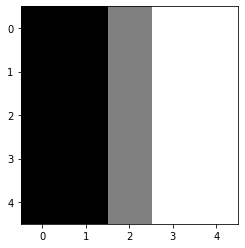

In [364]:
def Q(t: float) -> float:
    return 2*t**2 - 1

# Calculates Klein Filter value for position (x,y)
def klein_filter(theta1: float, theta2: float, x: int, y: int) -> float:
    return np.sin(theta2)*(np.cos(theta1)*x+ np.sin(theta1)*y) + np.cos(theta2)*Q(np.cos(theta1)*x + np.sin(theta1)*y)

# Generates a Circle Filter value for position (x,y)
def primary_circle(theta: float, x: int, y: int) -> float:
    return klein_filter(theta, np.pi /2, x,y)

# Generates a complete Klein or Primary Circle filter/kernel
def generate_kernel(size: int, theta1: float, theta2 = np.pi /2) -> np.ndarray:
    results = []
    # This linspace seems to work for KFs but not CFs
    # We might need to find a different way of choosing our x,y values
    linspace = np.linspace(-1,1,size)
    for x in linspace :
        row = []
        for y in linspace :
            kf = klein_filter(theta1, theta2, x, y)
            row.append(kf)
        results.append(row)
    results = np.array(results)
    return results 

def generate_klein_filter(size: int, theta1: float, theta2: float, points: np.ndarray) -> np.ndarray:
    results = []
    for xy in points:
        row = []
        for x, y in xy:
            cf = klein_filter(theta1, theta2, x, y)
            row.append(cf)
        results.append(row)
    results = np.array(results)
    return results

def generate_primary_circle_filter(size: int, theta: float, points: np.ndarray) -> np.ndarray:
    results = []
    for xy in points:
        row = []
        for x, y in xy:
            cf = primary_circle(theta, x, y)
            row.append(cf)
        results.append(row)
    results = np.array(results)
    return results

def convolve_image(image: torch.Tensor, weights: torch.Tensor, nb_channels: int) -> torch.Tensor:
    weights = weights.view(1, 1, weights.shape[0], weights.shape[1]).repeat(1, nb_channels, 1, 1)
    output = F.conv2d(image, weights).squeeze(0)
    return output

points = np.array([[(-1, -1), (-1, -1), (0, -1), (1, -1), (1, -1)], [(-1, -1), (-1, -1), (0, -1), (1, -1), (1, -1)], [(-1, -1), (-1, -1), (0, -1), (1, -1), (1, -1)], [(-1, -1), (-1, -1), (0, -1), (1, -1), (1, -1)], [(-1, -1), (-1, -1), (0, -1), (1, -1), (1, -1)]])
plt.imshow(generate_primary_circle_filter(5, -np.pi/4, points), cmap=plt.get_cmap('gray'))

In [268]:
def display_kernels(thetas: [float], size: int) -> None:
    # convert each image to tensor format
    for theta1 in thetas:
        for theta2 in thetas:
            kfilter = generate_kernel(size, theta1, theta2)
            output = convolve_image(image=trainset[0][0], weights=torch.tensor(kfilter, dtype=torch.float32), nb_channels=1)
            ax = sns.heatmap(kfilter, cmap=cm.gray)
            #ax2 = plt.imshow(output, cmap=plt.get_cmap('gray'))
            ax.set_title("Theta1: {}\u03c0 and Theta2: {}\u03c0".format(theta1 / np.pi, theta2 / np.pi))
            plt.show()

## KF filters

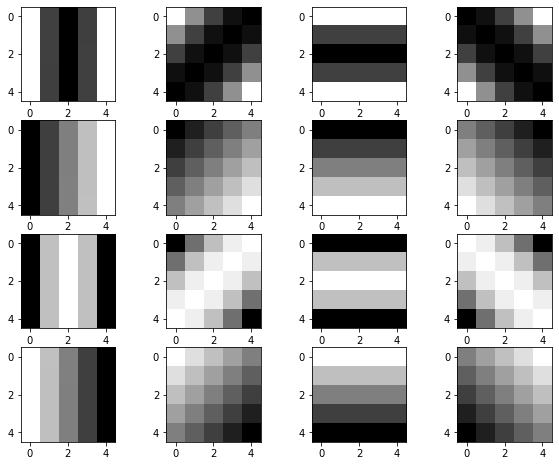

In [336]:
thetas1 = [np.pi/2, np.pi/4, 0, -np.pi/4]
thetas2 = [0, np.pi/2, np.pi, -np.pi/2]

fig, axs = plt.subplots(len(thetas2), len(thetas2), figsize=(10, 8))
for i, theta2 in enumerate(thetas2):
    for j, theta1 in enumerate(thetas1):
        kfilter = generate_kernel(5, theta1, theta2)
        axs[i][j].imshow(kfilter, cmap=plt.get_cmap('gray'))

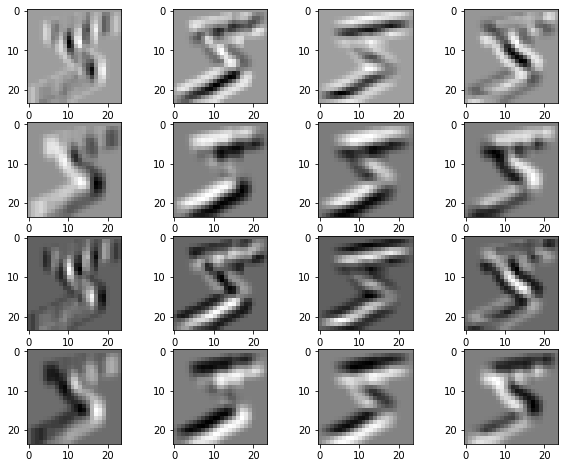

In [337]:
thetas2 = [0, np.pi/2, np.pi, -np.pi/2]
thetas1 = [np.pi/2, np.pi/4, 0, -np.pi/4]

transform = transforms.Compose([
        transforms.ToTensor()  # convert to tensor
    ])
trainset = MNIST(".", train=True, download=True, transform=transform)


fig, axs = plt.subplots(len(thetas2), len(thetas2), figsize=(10, 8))
for i, theta2 in enumerate(thetas2):
    for j, theta1 in enumerate(thetas1):
        kfilter = generate_kernel(5, theta1, theta2)
        output = convolve_image(image=trainset[0][0], weights=torch.tensor(kfilter, dtype=torch.float32), nb_channels=1)
        axs[i][j].imshow(output, cmap=plt.get_cmap('gray'))

## CF filters

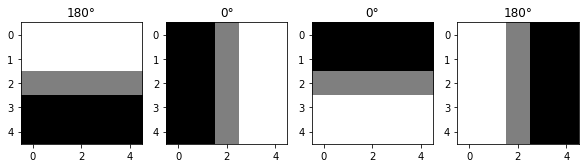

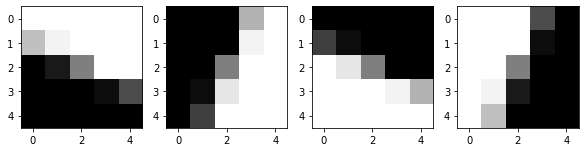

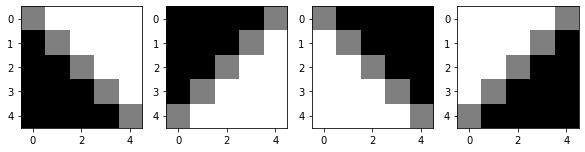

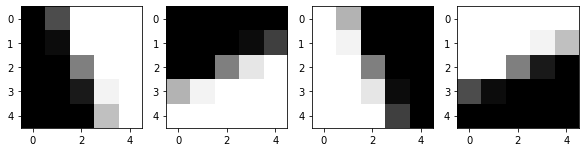

In [215]:
matrices = [np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)]])]
pis = [np.pi, 0, 0, np.pi]
i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax, interp in zip(axs, ['180°', '0°', '0°', '180°']):
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    ax.imshow(cfilter, cmap=plt.get_cmap('gray'))
    ax.set_title(interp.capitalize())
    i += 1

matrices = [np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-0.5, -0.5), (-0.9, -0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.8, 0.8), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0.9, 0.9), (0.4, 0.4)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (0.4, 0.4), (1, 1)], [(-1, -1), (-1, -1), (-1, -1), (0.9, 0.9), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-0.9, -0.9), (0.8, 0.8), (1, 1), (1, 1)], [(-1, -1), (-0.5, -0.5), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-0.5, -0.5), (-0.9, -0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.8, 0.8), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0.9, 0.9), (0.4, 0.4)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (0.4, 0.4), (1, 1)], [(-1, -1), (-1, -1), (-1, -1), (0.9, 0.9), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-0.9, -0.9), (0.8, 0.8), (1, 1), (1, 1)], [(-1, -1), (-0.5, -0.5), (1, 1), (1, 1), (1, 1)]])]

i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax in axs:
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    ax.imshow(cfilter, cmap=plt.get_cmap('gray'))
    i += 1
    
matrices = [np.array([[(0, 0), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0, 0), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0, 0), (-1, -1)], [(1, 1), (1, 1), (1, 1), (1, 1), (0, 0)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (0, 0)], [(-1, -1), (-1, -1), (-1, -1), (0, 0), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (0, 0), (1, 1), (1, 1), (1, 1)], [(0, 0), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(0, 0), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0, 0), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0, 0), (-1, -1)], [(1, 1), (1, 1), (1, 1), (1, 1), (0, 0)]] ),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (0, 0)], [(-1, -1), (-1, -1), (-1, -1), (0, 0), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (0, 0), (1, 1), (1, 1), (1, 1)], [(0, 0), (1, 1), (1, 1), (1, 1), (1, 1)]])]

i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax in axs:
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    ax.imshow(cfilter, cmap=plt.get_cmap('gray'))
    i += 1
    
matrices = [np.array([[(1, 1), (0.4, 0.4), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.9, 0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0.8, 0.8), (-0.9, -0.9), (-1, -1)], [(1, 1), (1, 1), (1, 1),  (-0.5, -0.5), (-1, -1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)],[(-1, -1), (-1, -1), (-1, -1), (-0.9, -0.9), (-0.5, -0.5)],[(-1, -1), (-1, -1), (0, 0), (0.8, 0.8), (1, 1)],[(0.4, 0.4), (0.9, 0.9), (1, 1), (1, 1), (1, 1)],[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(1, 1), (0.4, 0.4), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.9, 0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0.8, 0.8), (-0.9, -0.9), (-1, -1)], [(1, 1), (1, 1), (1, 1),  (-0.5, -0.5), (-1, -1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)],[(-1, -1), (-1, -1), (-1, -1), (-0.9, -0.9), (-0.5, -0.5)],[(-1, -1), (-1, -1), (0, 0), (0.8, 0.8), (1, 1)],[(0.4, 0.4), (0.9, 0.9), (1, 1), (1, 1), (1, 1)],[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]])]

i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax in axs:
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    ax.imshow(cfilter, cmap=plt.get_cmap('gray'))
    i += 1
     
plt.show()

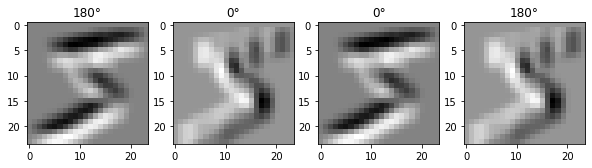

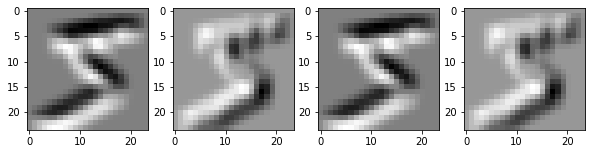

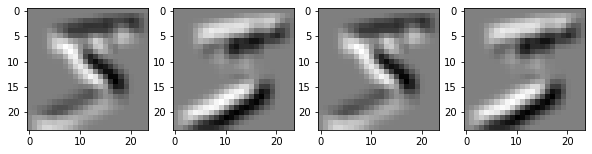

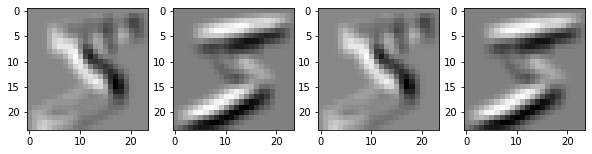

In [214]:
# convert each image to tensor format
transform = transforms.Compose([
    transforms.ToTensor()  # convert to tensor
])
trainset = MNIST(".", train=True, download=True, transform=transform)

matrices = [np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)]])]
pis = [np.pi, 0, np.pi, 0]
i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax, interp in zip(axs, ['180°', '0°', '0°', '180°']):
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    output = convolve_image(image=trainset[0][0], weights=torch.tensor(cfilter, dtype=torch.float32), nb_channels=1)
    ax.imshow(output, cmap=plt.get_cmap('gray'))
    ax.set_title(interp.capitalize())
    i += 1

matrices = [np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-0.5, -0.5), (-0.9, -0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.8, 0.8), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0.9, 0.9), (0.4, 0.4)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (0.4, 0.4), (1, 1)], [(-1, -1), (-1, -1), (-1, -1), (0.9, 0.9), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-0.9, -0.9), (0.8, 0.8), (1, 1), (1, 1)], [(-1, -1), (-0.5, -0.5), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(-0.5, -0.5), (-0.9, -0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.8, 0.8), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0.9, 0.9), (0.4, 0.4)], [(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (0.4, 0.4), (1, 1)], [(-1, -1), (-1, -1), (-1, -1), (0.9, 0.9), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (-0.9, -0.9), (0.8, 0.8), (1, 1), (1, 1)], [(-1, -1), (-0.5, -0.5), (1, 1), (1, 1), (1, 1)]])]

i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax in axs:
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    output = convolve_image(image=trainset[0][0], weights=torch.tensor(cfilter, dtype=torch.float32), nb_channels=1)
    ax.imshow(output, cmap=plt.get_cmap('gray'))
    i += 1
    
matrices = [np.array([[(0, 0), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0, 0), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0, 0), (-1, -1)], [(1, 1), (1, 1), (1, 1), (1, 1), (0, 0)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (0, 0)], [(-1, -1), (-1, -1), (-1, -1), (0, 0), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (0, 0), (1, 1), (1, 1), (1, 1)], [(0, 0), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(0, 0), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0, 0), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (1, 1), (0, 0), (-1, -1)], [(1, 1), (1, 1), (1, 1), (1, 1), (0, 0)]] ),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (0, 0)], [(-1, -1), (-1, -1), (-1, -1), (0, 0), (1, 1)], [(-1, -1), (-1, -1), (0, 0), (1, 1), (1, 1)], [(-1, -1), (0, 0), (1, 1), (1, 1), (1, 1)], [(0, 0), (1, 1), (1, 1), (1, 1), (1, 1)]])]

i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax in axs:
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    output = convolve_image(image=trainset[0][0], weights=torch.tensor(cfilter, dtype=torch.float32), nb_channels=1)
    ax.imshow(output, cmap=plt.get_cmap('gray'))
    i += 1
    
matrices = [np.array([[(1, 1), (0.4, 0.4), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.9, 0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0.8, 0.8), (-0.9, -0.9), (-1, -1)], [(1, 1), (1, 1), (1, 1),  (-0.5, -0.5), (-1, -1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)],[(-1, -1), (-1, -1), (-1, -1), (-0.9, -0.9), (-0.5, -0.5)],[(-1, -1), (-1, -1), (0, 0), (0.8, 0.8), (1, 1)],[(0.4, 0.4), (0.9, 0.9), (1, 1), (1, 1), (1, 1)],[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]]),
           np.array([[(1, 1), (0.4, 0.4), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (0.9, 0.9), (-1, -1), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0, 0), (-1, -1), (-1, -1)], [(1, 1), (1, 1), (0.8, 0.8), (-0.9, -0.9), (-1, -1)], [(1, 1), (1, 1), (1, 1),  (-0.5, -0.5), (-1, -1)]]),
           np.array([[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)],[(-1, -1), (-1, -1), (-1, -1), (-0.9, -0.9), (-0.5, -0.5)],[(-1, -1), (-1, -1), (0, 0), (0.8, 0.8), (1, 1)],[(0.4, 0.4), (0.9, 0.9), (1, 1), (1, 1), (1, 1)],[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]])]

i = 0
fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for ax in axs:
    matrix = matrices[i]
    cfilter = generate_primary_circle_filter(5, pis[i], matrix)
    output = convolve_image(image=trainset[0][0], weights=torch.tensor(cfilter, dtype=torch.float32), nb_channels=1)
    ax.imshow(output, cmap=plt.get_cmap('gray'))
    i += 1
    
plt.show()